# Simple Linear Regression

In this notebook, we'll build a linear regression model to predict `Sales` using an appropriate predictor variable.

## Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [23]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [24]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

In [25]:
# Read the given CSV file, and view some sample records

advertising = pd.read_csv(r"D:\Upgrad - PG diploma - datascience\Course 2_ML-I\Linear regression\advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


First three are independent variables and the last one is target variable.First three represents advertising in tv , radio , news paper and the sales represents the sales that have come due to advertising in theese three domains i.e tv,radio,news paper

Let's inspect the various aspects of our dataframe

In [26]:
advertising.shape

(200, 4)

In [27]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [28]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Step 2: Visualising the Data

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to `Sales`.

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns

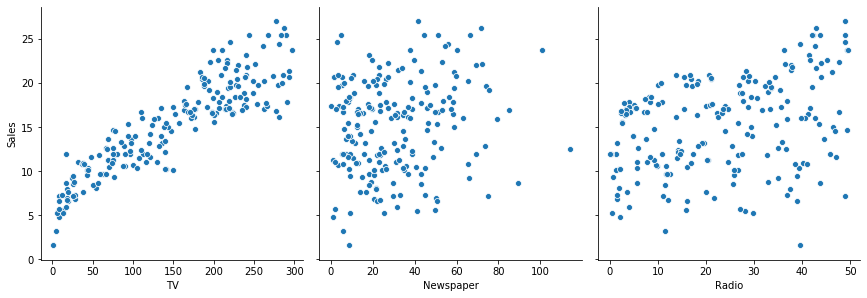

In [30]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

From the above plot tv vs sales has stronger correlation than other two graphs

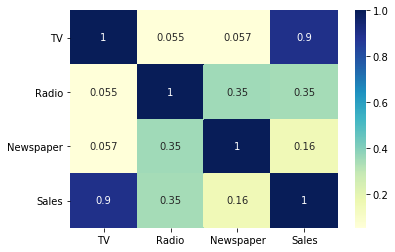

In [31]:
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

As is visible from the pairplot and the heatmap, the variable `TV` seems to be most correlated with `Sales`. So let's go ahead and perform simple linear regression using `TV` as our feature variable.

You read the data and visualised it using 'seaborn'. You also looked at the correlations between the target variable ‘Sales’ and the different predictor variables and saw that ‘TV’ has the strongest correlation with ‘Sales’. Sales and TV are linearly correlated. 

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$sales = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [32]:
X = advertising['TV']
y = advertising['Sales']

#### Train-Test Split

You now need to split our variable into training and testing sets. You'll perform this by importing `train_test_split` from the `sklearn.model_selection` library. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
# Let's now take a look at the train dataset

X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [35]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building a Linear Model

You first need to import the `statsmodel.api` library using which you'll perform the linear regression.

We can train model using both stats model and sklearn packages <br>
first we see how we can train using stats model package then we can look into sklearn training method

In [36]:
import statsmodels.api as sm

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the `add_constant` attribute of `statsmodels`. And once you've added the constant to your `X_train` dataset, you can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below

OLS is normal least loss method ...like we basically square errors and minimize it....thats it

Here, OLS stands for Ordinary Least Squares, which is the method that 'statsmodels' use to fit the line. You use the command 'add_constant' so that statsmodels also fits an intercept. If you don't use this command, it will fit a line passing through the origin by default.

In [37]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


print(X_train_sm)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm)  
# so basically above the object is created and parameters are not yet found.... therefore to fit the model we use fit function
lr = lr.fit()

     const     TV
74     1.0  213.4
3      1.0  151.5
185    1.0  205.0
26     1.0  142.9
90     1.0  134.3
..     ...    ...
87     1.0  110.7
103    1.0  187.9
67     1.0  139.3
24     1.0   62.3
8      1.0    8.6

[140 rows x 2 columns]


So above what happened is now stats model considers that there are two independent variables one is TV,another is const.<br>

therefore now the equation is like y = a*tv + b*const which is equal to y = a*TV + b since const is equal to one for all. in this way we can use this add constant funtion to create a line that wont pass through origin

In [38]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [18]:
#Therefore the line is sales = 0.05*TV + 6.94*const = 0.05*TV + 6.94

The advantage of training using statsmodels library over sklearn is that stats model shows the details of summary of stats..as you can see down below

In [39]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           1.52e-52
Time:                        19:10:54   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

Basically standasrd error of a sample represents how this sample varies for variation in selection of sample

Standard error of regression coefficient is how error changes with change in x ....it can be given using the below fornula:

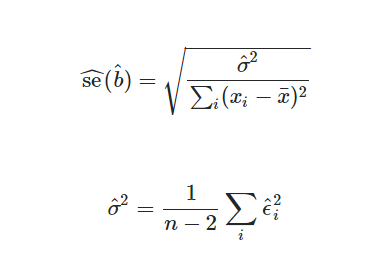

In [22]:
from IPython.display import Image
Image("D:/Capture.png")

where sigma squared is the standard error of regression estimate

The standard error(also known as standard deviation of sampling distribution), or standard error of the mean, of multiple samples is the standard deviation of the sample means thereforee standard error of regression estimate is .....how if we change sample then what will be the effetc...like population estimate i.e actual value is yactual...and our sample estimate is ypred..therefore standard error is (ypred-yactual)^2/(n-2) <br>

Similarly standard error for regression coefficient is b actuaal - b pred which is yactual/x - y pred/x = (yactual-ypres)/x therefore standard error of regression coefficient depends on error and sample data of x 

Also dont think much about dervation of standard error as it is very high level shit...the only thing to remember is standard error of a sample mean means how this sample mean varies if we take different samples with respect to population mean....in other words how accurately given sample mean tells you about population mean.....

Therefore in sampling distribution curve the mean is population mean and standard deviarion is standard error

####  Looking at some key statistics from the summary

The values we are concerned with are - 
1. The coefficients and significance (p-values)
2. R-squared
3. F statistic and its significance

##### 1. The coefficient for TV is 0.054, with a very low p value (0.000)
The coefficient is statistically significant. So the association is not purely by chance. 

##### 2. R - squared is 0.816
Meaning that 81.6% of the variance in `Sales` is explained by `TV`

This is a decent R-squared value.

##### F statistic

You were introduced to a new term named F-statistic and Prob(F-statistic). Now, recall that in the last segment, you did a hypothesis test for beta to determine whether or not the coefficient 
β
1
 outputted by the model was significant or not. Now, F-statistic is similar in the sense that now instead of testing the significance of each of the betas, it tells you whether the overall model fit is significant or not. This parameter is examined because many a time it happens that even though all of your betas are significant, but your overall model fit might happen just by chance.

The heuristic is similar to what you learnt in the normal p-value calculation as well. If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. In the image above, you can see that the p-value of the F-statistic is 1.52e-52  which is practically a zero value. This means that the model for which this was calculated is definitely significant since it is less than 0.05.

This will be more appreciable when you study multiple linear regression since there you have a lot of betas for the different predictor variables and thus there it is very helpful in determining if all the predictor variables together as a whole are significant or not or simply put, it tells you whether the model fit as a whole is significant or not. 

The p-values of the coefficients (in this case just one coefficient for TV) tell you whether the coefficient is significant or not. In this case, the coefficient of TV came out to be 0.0545 with a standard error of about 0.002. Thus, you got a t-value of 24.722 which lead to a practically zero p-value. Hence, you can say that your coefficient is indeed significant. 

 

Apart from this, the summary statistics outputs a few more metrics which are not of any use as of now. But you'll learn about some more of them in multiple linear regression.

###### 3. F statistic has a very low p value (practically low)
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.

P value of f statistic talks about how significant the R squared is... <br>
R-Square tell us that how much of the percent of variance in target variable is explained by the independent variable. A low R-Square means that independent var4iable does not predict the Target variable very well.

On the other had, p value of F Statistic tells us that R-Square value is not by chance, so if R-Square value was good enough and the p value of f statistic was close to 0, in that case it justifies that the high R-Square value is not just by luck.

Low p value of F Statistic simply tells us that the value we get for R-Squared is not just by chance and therefore is statistically significant.

F-statistics is the math used to get the F test. The F statistic value in regression is the result of a test where the null hypothesis is that all of the regression coefficients are equal to zero. In other words, the model has no predictive capability. Basically, the f-test compares your model with zero predictor variables (the intercept only model) and decides whether your added coefficients improved the model. If you get a significant result, then whatever coefficients you included in your model improved the model’s fit. So the F-statistic value with large value can be considered optimal. Large in the sense large when compared with models built when adding/removing the no.of predictors.

If the 'Prob (F-statistic)' is less than 0.05, you can conclude that the overall model fit is significant. If it is greater than 0.05, you might need to review your model as the fit might be by chance, i.e. the line may have just luckily fit the data. 

R-squared just tells you the extent of the fit, i.e. how much variance in the model is being explained by the fitted line. To determine the significance of fit, you need F-statistic. What F-statistic tells you is that how well the model fairs when the line is fitted as compared to if you just had an intercept

R squared talks about how much variance of target variable is explained by predictors but it only considers the model itself....where as f statistic talks aout multiple models and tells how this model is significant 

see this must watch for f statistic : https://www.youtube.com/watch?v=ie-MYQp1Nic

so how to calculate f statistic : <br>

h0 :  beta1 = beta2 = beta3 = ... = 0 <br>
h1 : any one of them is not equal to zero.

sum of squares of error in intercept model  = SSI <br>
sum of squares of error in our model = SSM 

therefore if difference between them is significant then we can reject the null hypothesis if not we fail to reject it....

f statistic if directly proportional to (SSI - SSM) ,also for more clear formulas u can see the above video link is given

also f statistic can be viewed as (R squared for intercept model - R squared for our model) <br>
if the difference is significant we can reject the null hypothesis else we can fail to reject it where null hypotheis is R squared will R squared of the null hypothesis and alternate hypothesis is our R squared......

For understanding the relationship between R squared and f test u can see this https://www.youtube.com/watch?v=Bs1koG5U2QU

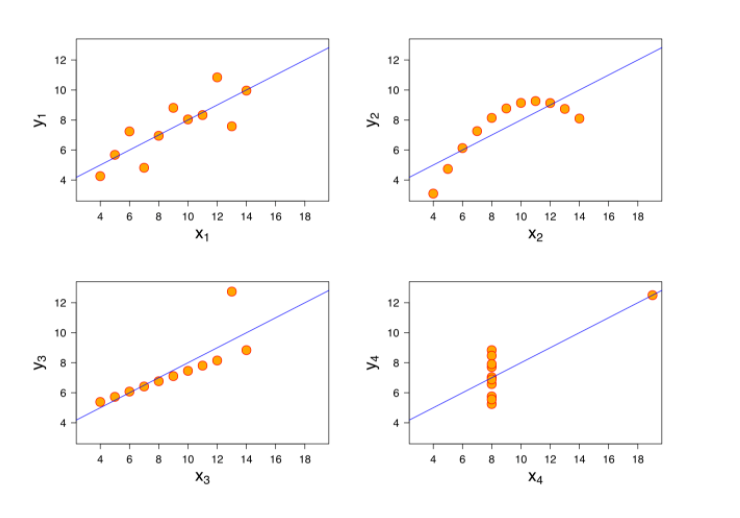

In [21]:
from IPython.display import Image
Image("D:/Capture.png")

In this image (also known as Anscombe's quartet), the R-squared value of all the 4 fits are the same, but F-statistic would deem a couple of them (X2 and X4) insignificant as you can observe.

In other words f statistixc is a hypothesis test on R squared parameter. If p value of f statistic is less it means the R squared we got is signiicant ,if not it is insignificant

In other words, F test indicates that there is a relationship ,High R2 then indicates how strong that relationship is.  <br>
,it means F test will tell wether the model we designed is suitable for whole population and we didnt get this by luck. <br>
lets say we get a sample where we do linear regresion to it and found out that r sqaured is high and p value of f test is low it means ...the model explins the variance of the estimate and also since p value is less it means there is some relationship between them and we can guarantee that there is relationship....what R squared tells you about how strong the relationship is......in short f test tells you about ....whether there is relationship or not..and R squared tells you how much strong the relationship is for the given model.  <br>

if there is high r swuared and p value of f stat is high...then <br> 
p value high for f test indicates that the relationsihp we got we cannot find enough evidence to reject null hypothesis of f test.(model without predictors).......so we created a linear regression model where it explains variance of the estimate and it is no different than the variance explained by the intercept model...therefore it means there is no use of creating this model as intercept model i.e a model without predictors gives the same output ...therefore we failed to reject null hypothesis..it means we cannot say our model is effective since we donot have evidence to say it is effective . this model may explain the given sample due to high r squared but we got this sample by luck and we cannot rely on this model .THerefore since variance explained by our model and intercpt model is similar we have no use of using predictors for predicting .So our model may explain the data well but this model is not enough evidence to disprove null hypothesis of f test . therefore our model is not useful or we can say we cannot rely on our model.


If there is low r squared and p value of f stat is low then  <br>
it means the model we got there is strong evidwence that this reltionship is enough to say that predictors are useful in predicitng the estimates .But the mdel we got since R squared is less it means it cant capture variance of the estimates .
therefore we can say relationship is there between estimators and predictors but not strong enough.....

If there is low r squared and p value of f stat is high then <br>
the model we got we donot have enough evidence that we can rely on this model...also model is not explaining the rvariance of estimators too ....

Therefore high p value of f test indicates we cannot rely on our model and low p value says we can

---
The fit is significant. Let's visualize how well the model fit the data.

From the parameters that we get, our linear regression equation becomes:

$ Sales = 6.948 + 0.054 \times TV $

Additional resource : https://en.wikipedia.org/wiki/F-test

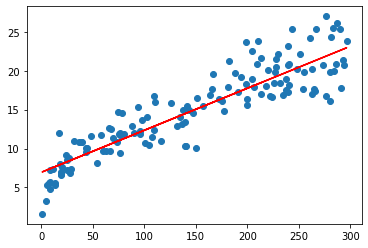

In [40]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

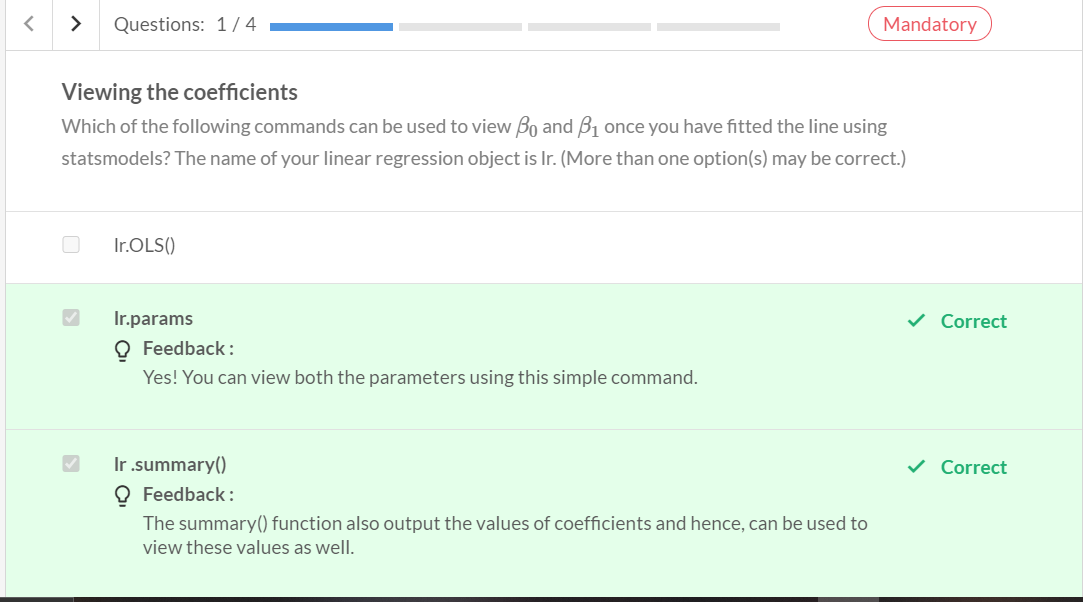

In [27]:
from IPython.display import Image
Image("D:/Capture.png")

Additional sources :  <br>
http://users.stat.ufl.edu/~winner/qmb3250/notespart2.pdf <br>
https://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf

## Step 4: Residual analysis 
To validate assumptions of the model, and hence the reliability for inference

Now that you have built the linear model, you can move ahead with the next steps. Now, building the model on the train set has two parts - fitting a line and validating the assumptions of regression.

Recall that one of the assumptions that you studied was that the error terms should be normally distributed with mean equal to 0. So once you have built the model, you'd need to verify if your model is not violating this assumption. And doing this is fairly simple - you just plot a histogram of the error terms to check whether they are normally distributed. And another assumption was that the error terms should be independent of each other. Again for this, you need to plot the error terms, this time with either of X or y to check for any patterns. 

#### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [41]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

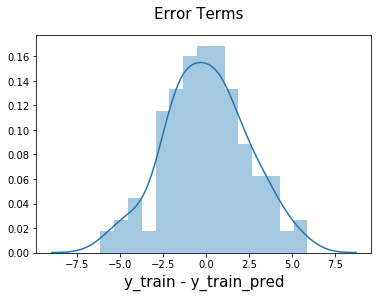

In [42]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

#### Looking for patterns in the residuals

We should not find any patterns in residuals pattern in the sense we shouldnot finf any inter relationsip between erro terms

If there is pattern it means there is relationship between error terms. Since in linear regression minimum sum of squares of errors wont capture inter dependency betweene themselves ,we say linear regression is not suitable for error terms where they are inter dependent.but if our model has high r squared and the error terms aree inter dependent to each other, it means the model explains variance of the estimator but the thing is we got lucky.....as the same model is not suitable for populatins .
Like for example , lets say the population consists of data points in the form of sine curve.....so in this example error teerms are inter dependent but if we take a sample and we got best fit for the sample but still it is not right becoz the model only explains the sample data but not the whole sine curve.

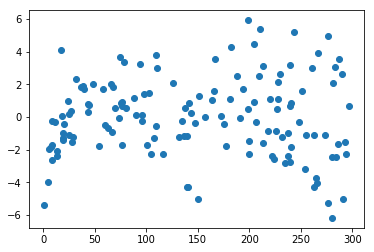

In [21]:
plt.scatter(X_train,res)
plt.show()

Also the residuals have uniform variance over all therefore another assumption is valid here

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

As you can see, the regression line is a pretty good fit to the data

## Step 5: Predictions on the Test Set

Now that you have fitted a regression line on your train dataset, it's time to make some predictions on the test data. For this, you first need to add a constant to the `X_test` data like you did for `X_train` and then you can simply go on and predict the y values corresponding to `X_test` using the `predict` attribute of the fitted regression line.

In [43]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [44]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

##### Looking at the RMSE

In [48]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966233

###### Checking the R-squared on the test set

In [47]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7921031601245658

##### Visualizing the fit on the test set

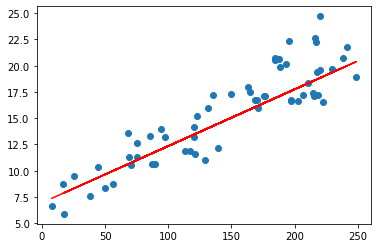

In [49]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

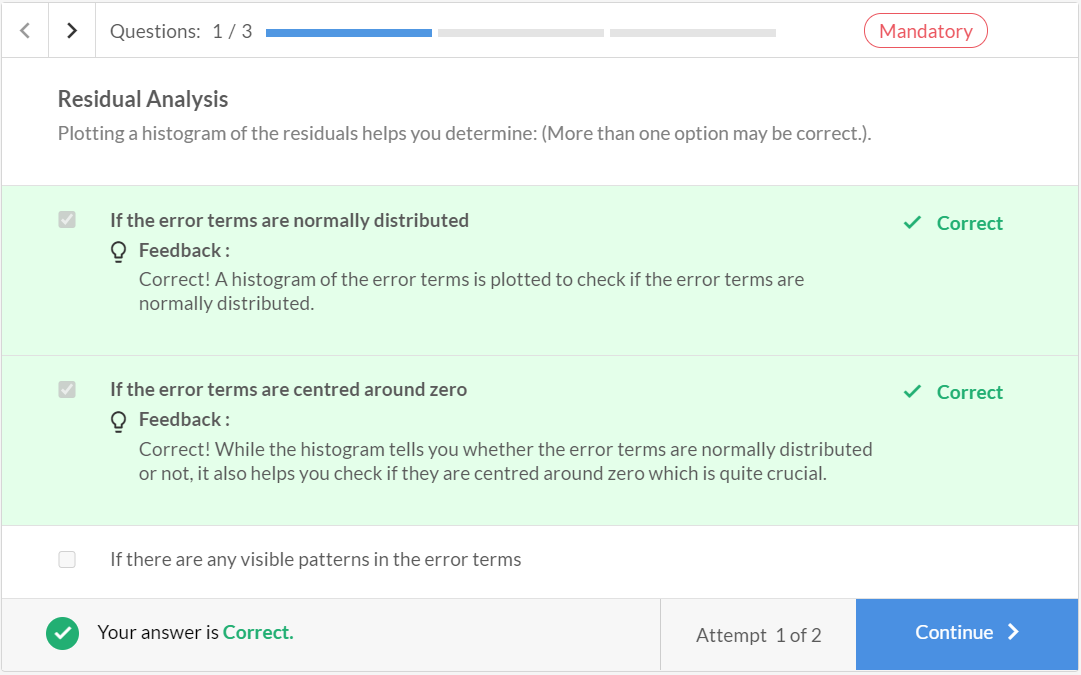

In [50]:
from IPython.display import Image
Image("D:/Capture.png")

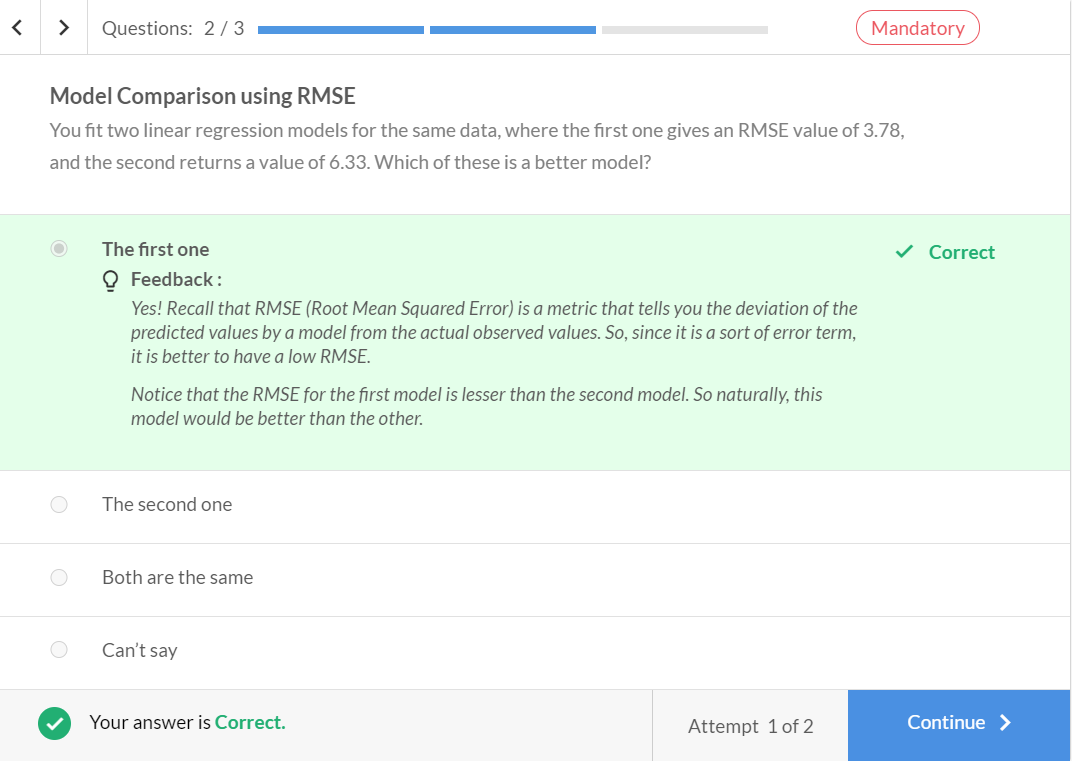

In [51]:
from IPython.display import Image
Image("D:/Capture.png")

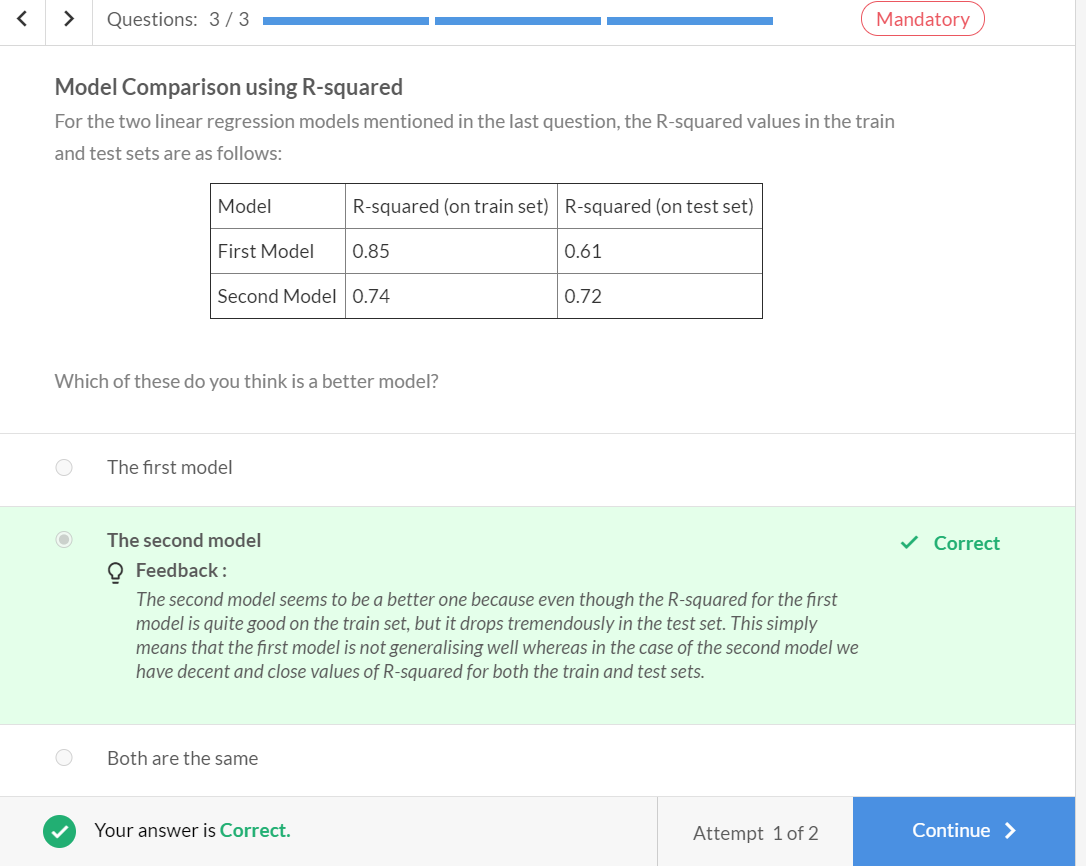

In [52]:
from IPython.display import Image
Image("D:/Capture.png")

Therefore if r squared of test data is rtest and r squared of train data is rtrain then <br>
if rtest lies in (rtrain - 5 percent of rtrain,rtrain + 5 percent of rtrain)  then the model is good model ....if rtest doesnt lie then the model is not good and we cannot rely on this model

## Now we will do linear regression using sklearn module

So far, you have worked with the 'statsmodels' package. This is a great package if you want to fit a line and draw inferences as well. But many times, you may not be interested in the statistics part of linear regression. You might just want to fit a line through the data and make predictions. In such cases, you can use 'SKLearn', which involves lesser hassle than 'statsmodels'. Also, the industry standard as to what package should be used varies widely. Some companies prefer statsmodels whereas some others prefer SKLearn, so it is better for you if you know about both of these packages.

### Linear Regression using `linear_model` in `sklearn`

Apart from `statsmodels`, there is another package namely `sklearn` that can be used to perform linear regression. We will use the `linear_model` library from `sklearn` to build the model. Since, we hae already performed a train-test split, we don't need to do it again.

There's one small step that we need to add, though. When there's only a single feature, we need to add an additional column in order for the linear regression fit to be performed successfully.

In [53]:
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [54]:
X_train_lm.shape

(140,)

Now X_train_lm is a series that is why shape is (140,) but sklearn accepts numpy arrays that too 2d numpy arrays.Therefore converting to numpy arrays........

In [56]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

In [57]:
print(X_train_lm.shape)
print(y_train_lm.shape)
print(X_test_lm.shape)
print(y_test_lm.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [58]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train_lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


In [60]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [61]:
# evaluating the model
print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.8157933136480389
0.7921031601245662


The equationwe get is the same as what we got before!

$ Sales = 6.948 + 0.054* TV $

Sklearn linear model is useful as it is compatible with a lot of sklearn utilites (cross validation, grid search etc.)

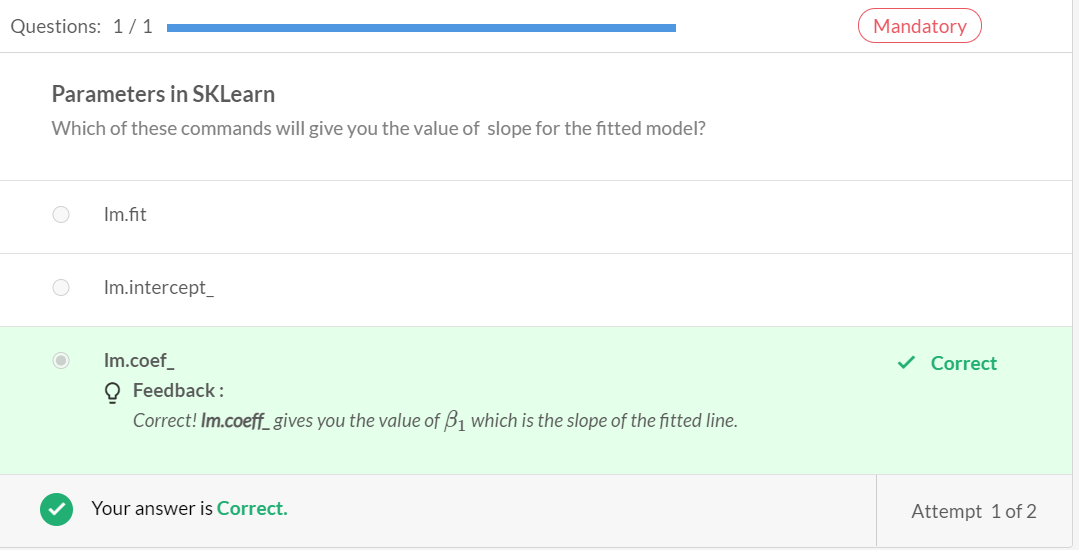

In [62]:
from IPython.display import Image
Image("D:/Capture.png")

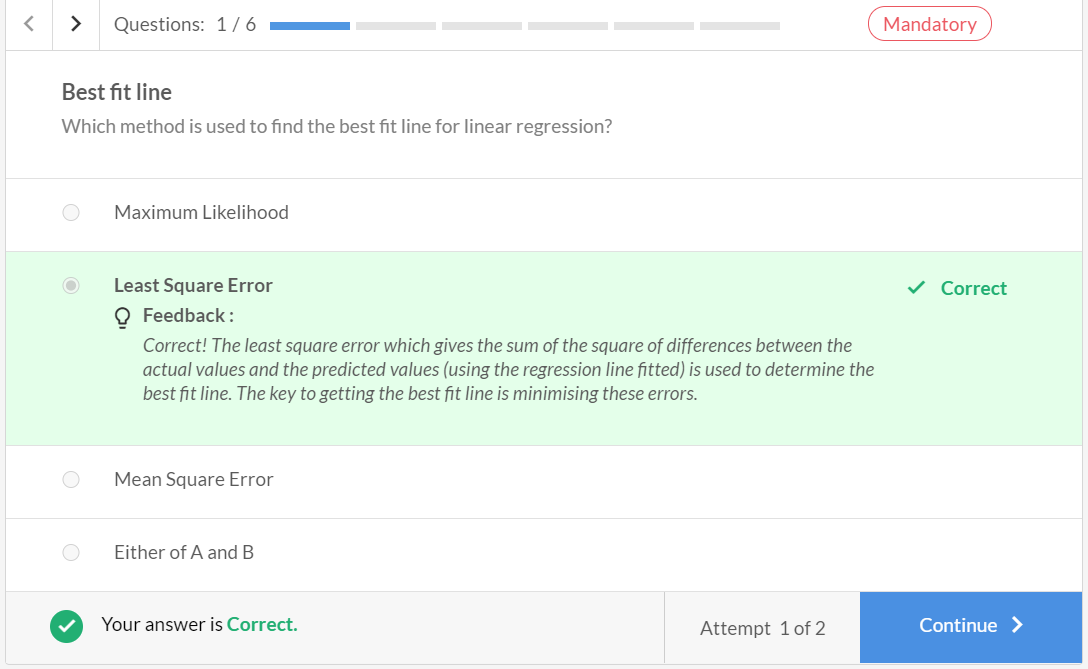

In [63]:
from IPython.display import Image
Image("D:/Capture.png")

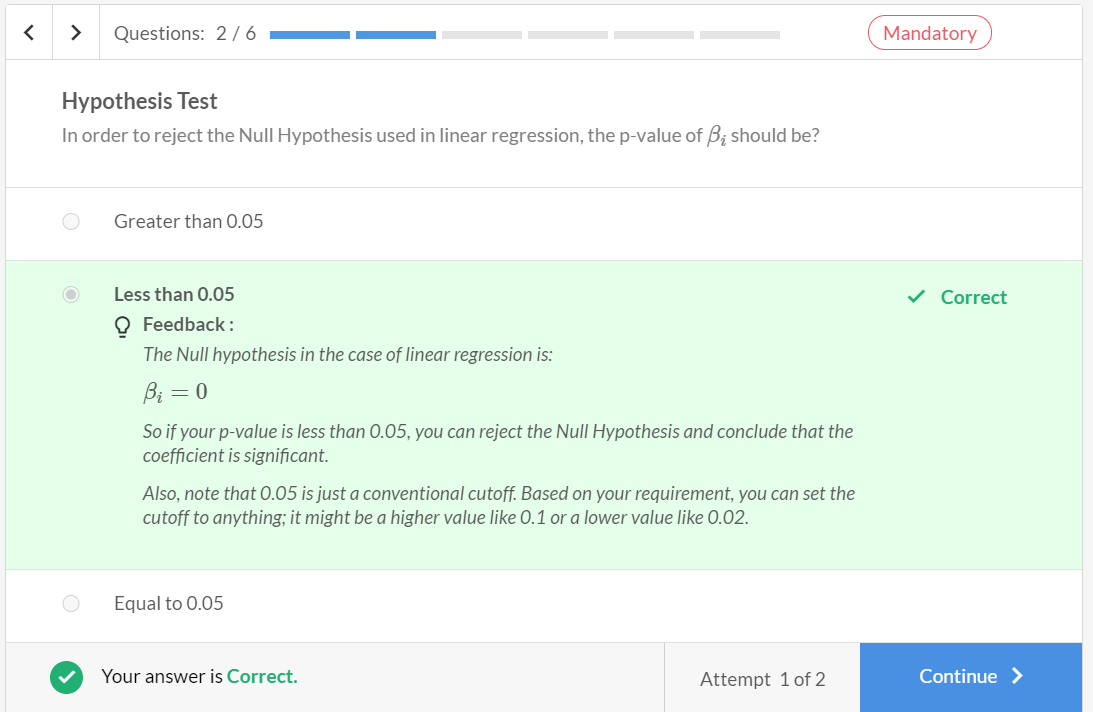

In [64]:
from IPython.display import Image
Image("D:/Capture.png")

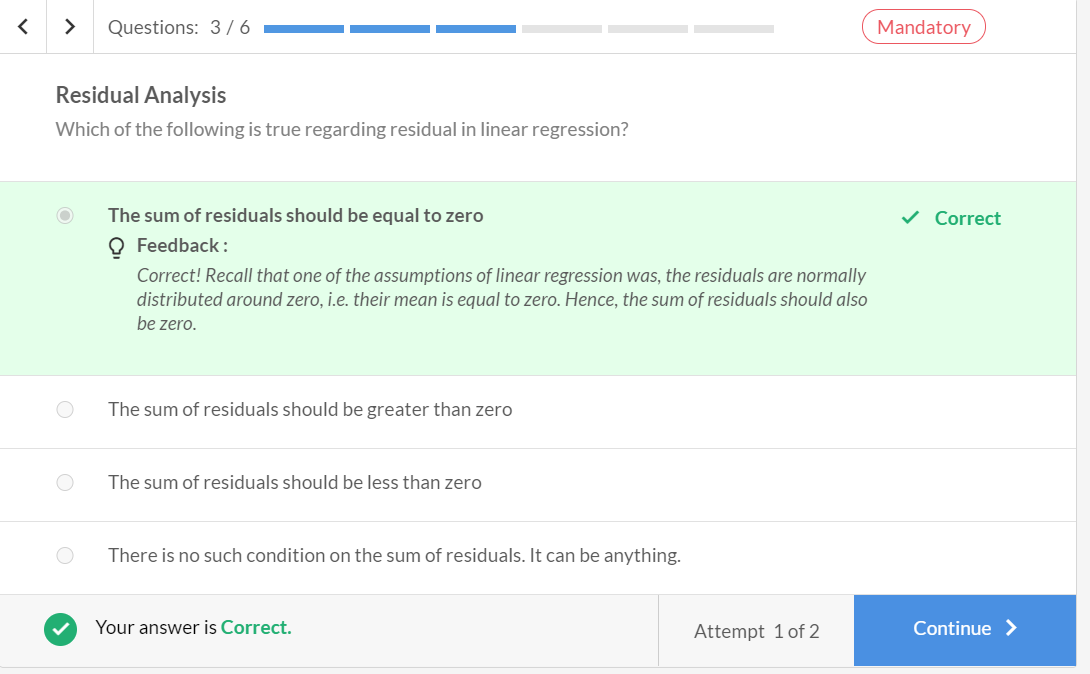

In [65]:
from IPython.display import Image
Image("D:/Capture.png")

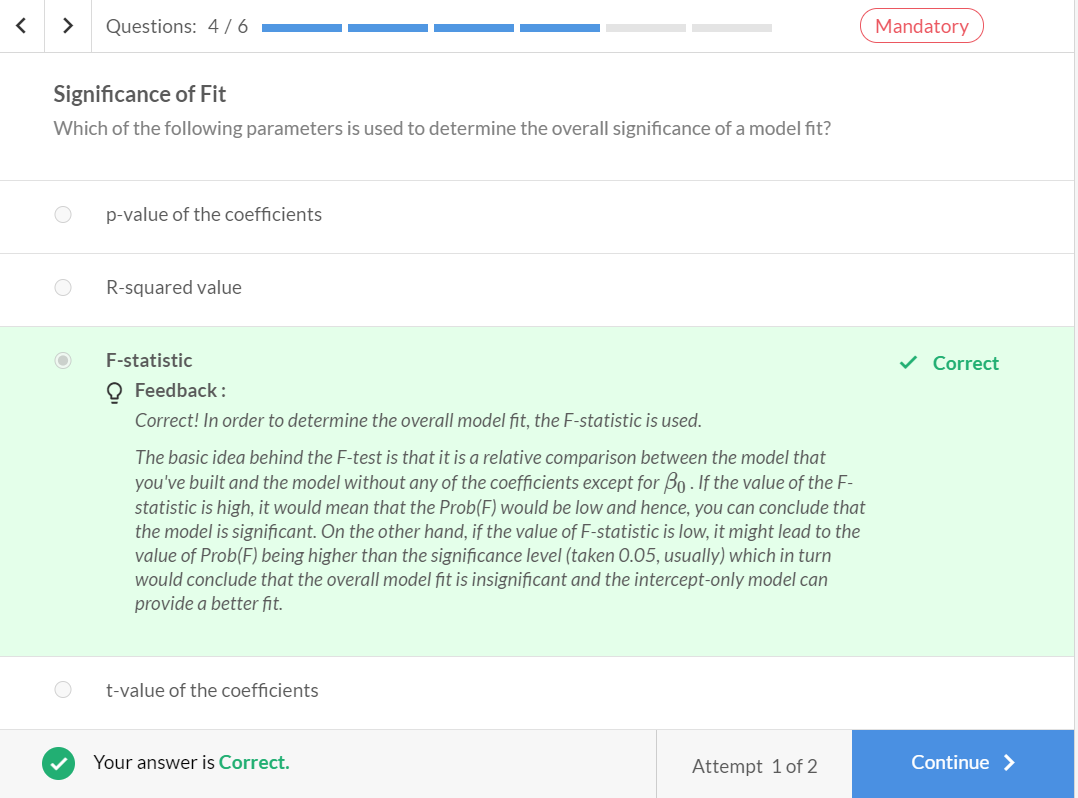

In [66]:
from IPython.display import Image
Image("D:/Capture.png")

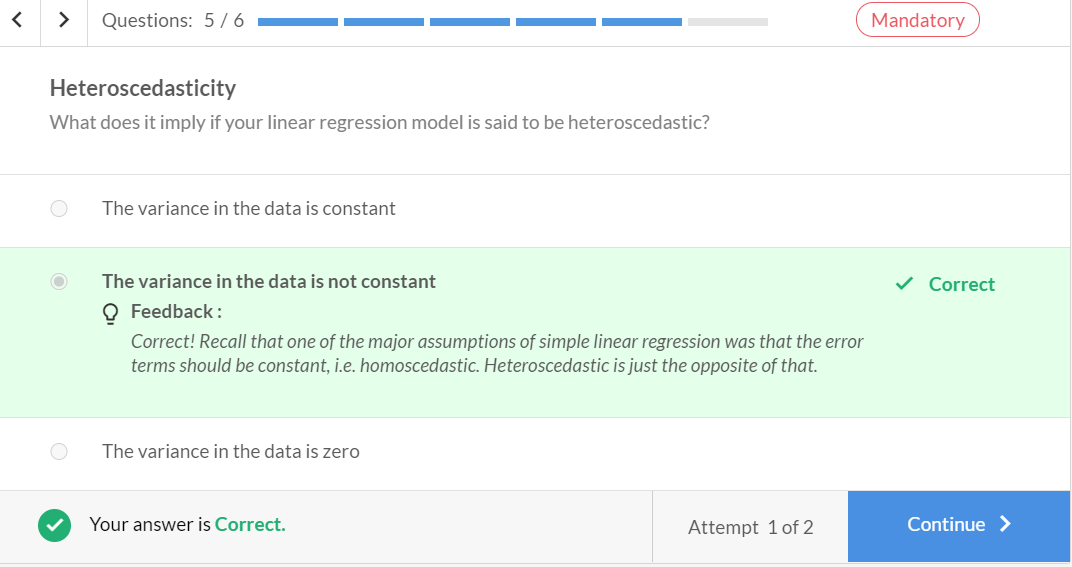

In [67]:
from IPython.display import Image
Image("D:/Capture.png")

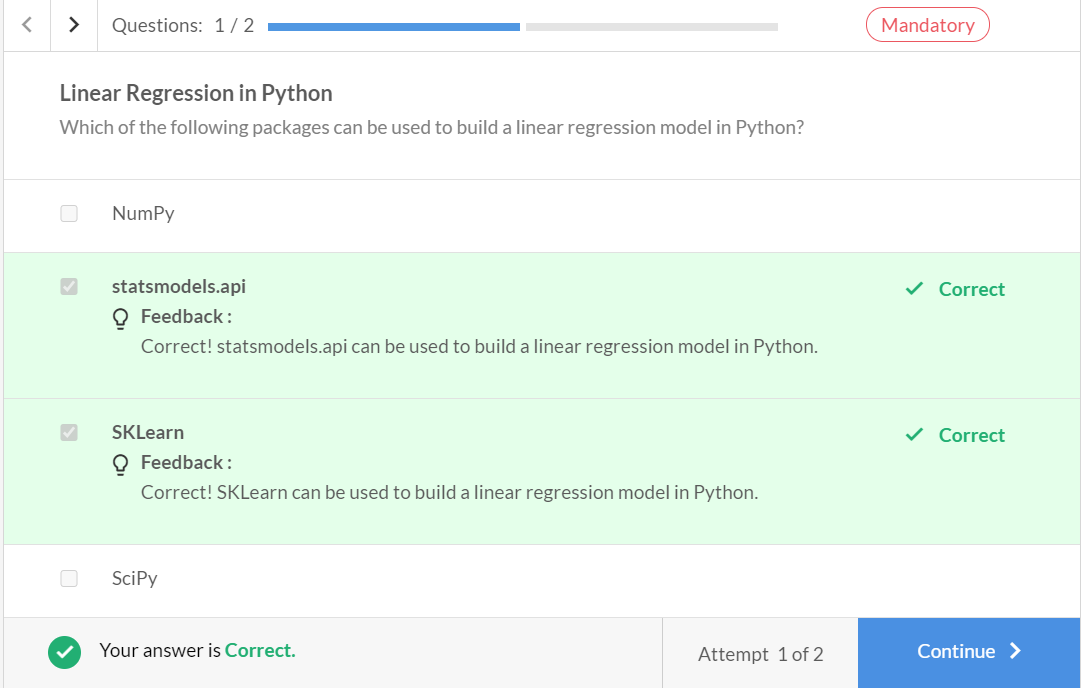

In [68]:
from IPython.display import Image
Image("D:/Capture.png")

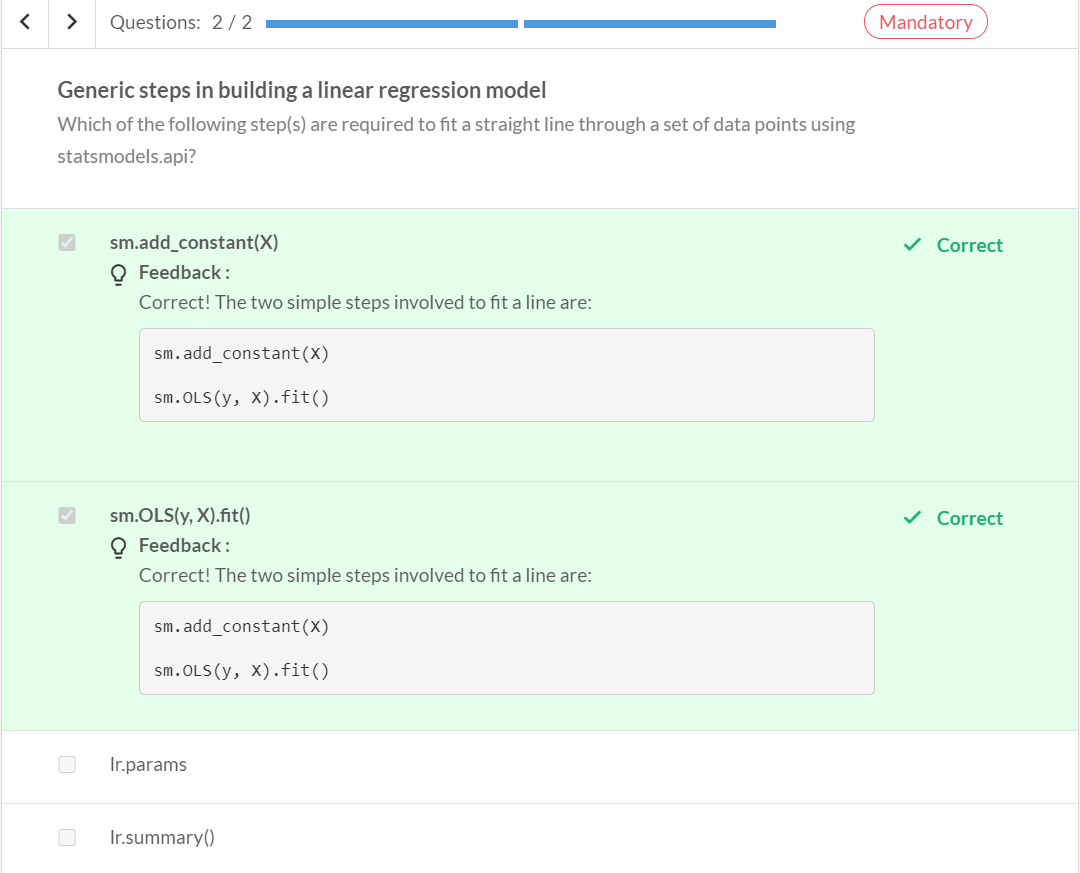

In [69]:
from IPython.display import Image
Image("D:/Capture.png")

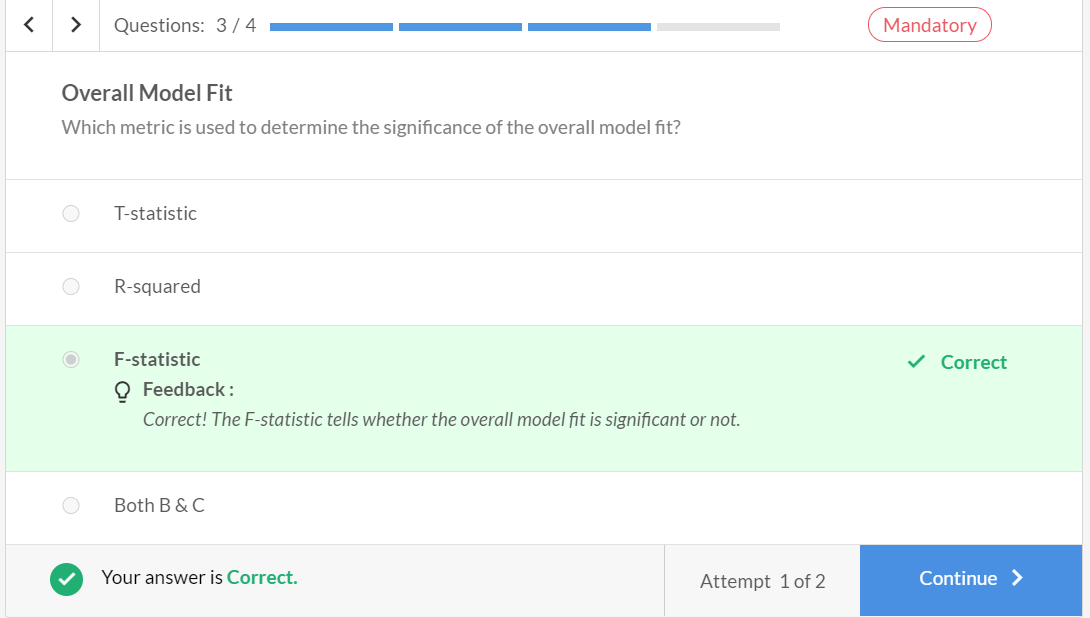

In [70]:
from IPython.display import Image
Image("D:/Capture.png")

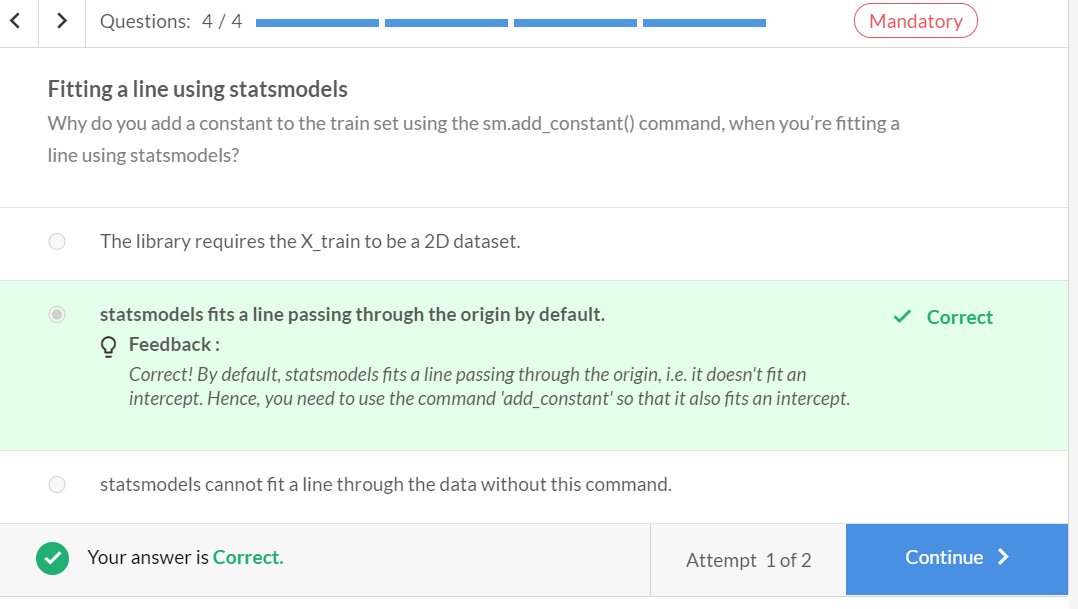

In [71]:
from IPython.display import Image
Image("D:/Capture.png")

---
## Addressing some common questions/doubts on Simple Linear Regression
---

### Q: Why is it called 'R-squared'?

Based on what we learnt so far, do you see it? Can you answer this?
 
 
 
 
 
 

.

.
 
.

.
 
  #### Drumroll...
  
.
 
.

.

.

In [34]:
corrs = np.corrcoef(X_train, y_train)
print(corrs)

[[1.         0.90321277]
 [0.90321277 1.        ]]


In [35]:
corrs[0,1] ** 2

0.8157933136480384

Correlation (Pearson) is also called **"r"** or **"Pearson's R"**

### Q: What is a good RMSE? Is there some RMSE that I should aim for?

<br>

<br>

You should be able to answer this by now!


<br>


<br>



Look at "Sharma ji ka beta"; he could answer this in a moment. How lucky is Sharma ji to have such a smart kid!

.

.
 
.

.
 
  #### Drumroll...
  
.
 
.

.

.

The RMSE:
 - depends on the units of the Y variables
 - is NOT a normalized measure
 
While it can't really tell you of the gooodness of the particular model, it can help you compare models. 

A better measure is R squared, which is normalized.

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

### Q: Does scaling have an impact on the model? When should I scale?

<br>
<br>
<br>
<br>
<br>
<br>

While the true benefits of scaling will be apparent during future modules, at this juncture we can discuss if it has an impact on the model.

We'll rebuild the model after scaling the predictor and see what changes.

The most popular methods for scaling:
1. Min-Max Scaling
2. Standard Scaling

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

#### SciKit Learn has these scaling utilities handy

In [37]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [38]:
# One aspect that you need to take care of is that the 'fit_transform' can be performed on 2D arrays only. So you need to
# reshape your 'X_train_scaled' and 'y_trained_scaled' data in order to perform the standardisation.
X_train_scaled = X_train.reshape(-1,1)
y_train_scaled = y_train.reshape(-1,1)

In [39]:
X_train_scaled.shape

(140, 1)

In [40]:
# Create a scaler object using StandardScaler()
scaler = StandardScaler()
#'Fit' and transform the train set; and transform using the fit on the test set later
X_train_scaled = scaler.fit_transform(X_train_scaled)
y_train_scaled = scaler.fit_transform(y_train_scaled)

In [41]:
print("mean and sd for X_train_scaled:", np.mean(X_train_scaled), np.std(X_train_scaled))
print("mean and sd for y_train_scaled:", np.mean(y_train_scaled), np.std(y_train_scaled))

mean and sd for X_train_scaled: 2.5376526277146434e-17 0.9999999999999999
mean and sd for y_train_scaled: -2.5376526277146434e-16 1.0


In [42]:
# Let's fit the regression line following exactly the same steps as done before
X_train_scaled = sm.add_constant(X_train_scaled)

lr_scaled = sm.OLS(y_train_scaled, X_train_scaled).fit()

In [43]:
# Check the parameters
lr_scaled.params

array([-2.91433544e-16,  9.03212773e-01])

As you might notice, the value of the parameters have changed since we have changed the scale.

Let's look at the statistics of the model, to see if any other aspect of the model has changed.

In [44]:
print(lr_scaled.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 13 Sep 2018   Prob (F-statistic):           1.52e-52
Time:                        22:39:46   Log-Likelihood:                -80.233
No. Observations:                 140   AIC:                             164.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.914e-16      0.037  -7.98e-15      1.0

#### Model statistics and goodness of fit remain unchanged.

##### So why scale at all?
- Helps with interpretation (we'll be able to appreciate this better in later modules)
- Faster convergence of gradient descent